## Environment configuration

In [1]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110845 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [3]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ajaysub110","key":"7b56b084357f7a49b13020f341bf511e"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions list -s rsna-pneumonia

ref                                 deadline             category   reward  teamCount  userHasEntered  
----------------------------------  -------------------  --------  -------  ---------  --------------  
rsna-pneumonia-detection-challenge  2018-10-31 23:59:00  Featured  $30,000       1499            True  


In [9]:
!kaggle competitions download rsna-pneumonia-detection-challenge

  0% 0.00/583k [00:00<?, ?B/s]
100% 583k/583k [00:00<00:00, 37.8MB/s]
  0% 0.00/155k [00:00<?, ?B/s]
100% 155k/155k [00:00<00:00, 49.4MB/s]
  0% 0.00/661k [00:00<?, ?B/s]
100% 661k/661k [00:00<00:00, 74.7MB/s]
 97% 367M/377M [00:02<00:00, 198MB/s]
100% 377M/377M [00:02<00:00, 153MB/s]
100% 3.29G/3.29G [00:35<00:00, 132MB/s]
100% 3.29G/3.29G [00:35<00:00, 98.2MB/s]
  0% 0.00/55.0 [00:00<?, ?B/s]
100% 55.0/55.0 [00:00<00:00, 52.7kB/s]


In [10]:
!ls

adc.json
drive
GCP%20Credits%20Request%20Link%20-%20RSNA.txt
kaggle.json
sample_data
stage_2_detailed_class_info.csv.zip
stage_2_sample_submission.csv
stage_2_test_images.zip
stage_2_train_images.zip
stage_2_train_labels.csv.zip


In [11]:
!unzip "./stage_2_train_images.zip" -d "./train/"
!unzip "./stage_2_test_images.zip" -d "./test/"

Archive:  ./stage_2_train_images.zip
  inflating: ./train/a4a28a4f-9496-430c-8cc1-cff2b44ac359.dcm  
  inflating: ./train/93a4df4f-bb28-4f02-9e1d-4fc147a93be5.dcm  
  inflating: ./train/ecf0161e-f058-4166-825e-4e1d5bf98d1e.dcm  
  inflating: ./train/995876a0-f2ae-475b-b410-62fd0aff7f3c.dcm  
  inflating: ./train/f4113fee-b7a0-472c-8f68-24e999fbf73a.dcm  
  inflating: ./train/3d8ec01f-d488-4816-8fee-036b69b43246.dcm  
  inflating: ./train/5fb17b91-e490-4f40-bc6b-7955028058c8.dcm  
  inflating: ./train/af4d7012-0021-4729-8eda-a8393698cf33.dcm  
  inflating: ./train/66830592-46b6-4907-9c06-845338b63fa2.dcm  
  inflating: ./train/edbc1975-81dd-4296-90f6-708e3f67e81a.dcm  
  inflating: ./train/5d8dbcf9-0d68-4aec-8638-b0a9f45d71d6.dcm  
  inflating: ./train/c8b4cab0-ad2f-43dd-96e4-cd6b81f93a6a.dcm  
  inflating: ./train/8f0e79ea-5db6-4a83-9886-c7d58f5f4825.dcm  
  inflating: ./train/6249ddb9-1c22-4b28-84c4-cbc153cbb8cf.dcm  
  inflating: ./train/6c93d95a-2f16-46ea-88d8-84906aa27d64.dcm  
  i

**Mask-RCNN Starter Model for the RSNA Pneumonia Detection Challenge with transfer learning **

Using pre-trained COCO weights trained on http://cocodataset.org as in https://github.com/matterport/Mask_RCNN/tree/master/samples/balloon

We get the best public kernel performance so far, and also training only within the 6hrs kaggle limit.

In [12]:
!pip install pydicom

    100% |████████████████████████████████| 7.0MB 6.3MB/s 


In [0]:
import os 
import sys
import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import pydicom
from imgaug import augmenters as iaa
from tqdm import tqdm
import pandas as pd 
import glob
from sklearn.model_selection import KFold

In [0]:
DATA_DIR = '/content/'
# Directory to save logs and trained model
ROOT_DIR = '/content/working/'

### Install Matterport's Mask-RCNN model from github.
See the [Matterport's implementation of Mask-RCNN](https://github.com/matterport/Mask_RCNN).

In [15]:
!git clone https://www.github.com/matterport/Mask_RCNN.git
os.chdir('/content/Mask_RCNN/')
!python setup.py -q install

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 914 (delta 0), reused 0 (delta 0), pack-reused 913
Receiving objects: 100% (914/914), 125.53 MiB | 32.85 MiB/s, done.
Resolving deltas: 100% (525/525), done.
zip_safe flag not set; analyzing archive contents...


In [16]:
!ls

assets	images	     mask_rcnn.egg-info  requirements.txt  setup.py
build	LICENSE      mrcnn		 samples
dist	MANIFEST.in  README.md		 setup.cfg


In [17]:
# Import Mask RCNN
sys.path.append(os.path.join(ROOT_DIR, 'Mask_RCNN'))  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

Using TensorFlow backend.


In [0]:
train_dicom_dir = os.path.join(DATA_DIR, 'train')
test_dicom_dir = os.path.join(DATA_DIR, 'test')

### Download COCO pre-trained weights

In [19]:
os.listdir()

['README.md',
 'samples',
 'build',
 'mrcnn',
 'images',
 'MANIFEST.in',
 'setup.cfg',
 '.gitignore',
 'dist',
 'assets',
 'setup.py',
 'mask_rcnn.egg-info',
 '.git',
 'requirements.txt',
 'LICENSE']

In [20]:
!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
!ls -lh mask_rcnn_coco.h5

COCO_WEIGHTS_PATH = "/content/Mask_RCNN/mask_rcnn_coco.h5"

-rw-r--r-- 1 root root 246M Nov 26  2017 mask_rcnn_coco.h5


### Some setup functions and classes for Mask-RCNN

- dicom_fps is a list of the dicom image path and filenames 
- image_annotions is a dictionary of the annotations keyed by the filenames
- parsing the dataset returns a list of the image filenames and the annotations dictionary

In [0]:
def get_dicom_fps(dicom_dir):
    dicom_fps = glob.glob(dicom_dir+'/'+'*.dcm')
    return list(set(dicom_fps))

def parse_dataset(dicom_dir, anns): 
    image_fps = get_dicom_fps(dicom_dir)
    image_annotations = {fp: [] for fp in image_fps}
    for index, row in anns.iterrows(): 
        fp = os.path.join(dicom_dir, row['patientId']+'.dcm')
        image_annotations[fp].append(row)
    return image_fps, image_annotations 

In [22]:
# The following parameters have been selected to reduce running time for demonstration purposes 
# These are not optimal 

class DetectorConfig(Config):
    """Configuration for training pneumonia detection on the RSNA pneumonia dataset.
    Overrides values in the base Config class.
    """
    
    # Give the configuration a recognizable name  
    NAME = 'pneumonia'
    
    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 8
    
    BACKBONE = 'resnet50'
    
    NUM_CLASSES = 2  # background + 1 pneumonia classes
    
    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 256
    RPN_ANCHOR_SCALES = (16, 32, 64, 128)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 4
    DETECTION_MAX_INSTANCES = 3
    DETECTION_MIN_CONFIDENCE = 0.78  ## match target distribution
    DETECTION_NMS_THRESHOLD = 0.01

    STEPS_PER_EPOCH = 200

config = DetectorConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        3
DETECTION_MIN_CONFIDENCE       0.78
DETECTION_NMS_THRESHOLD        0.01
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [0]:
class DetectorDataset(utils.Dataset):
    """Dataset class for training pneumonia detection on the RSNA pneumonia dataset.
    """

    def __init__(self, image_fps, image_annotations, orig_height, orig_width):
        super().__init__(self)
        
        # Add classes
        self.add_class('pneumonia', 1, 'Lung Opacity')
        
        # add images 
        for i, fp in enumerate(image_fps):
            annotations = image_annotations[fp]
            self.add_image('pneumonia', image_id=i, path=fp, 
                           annotations=annotations, orig_height=orig_height, orig_width=orig_width)
            
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def load_image(self, image_id):
        info = self.image_info[image_id]
        fp = info['path']
        ds = pydicom.read_file(fp)
        image = ds.pixel_array
        # If grayscale. Convert to RGB for consistency.
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)
        return image

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        annotations = info['annotations']
        count = len(annotations)
        if count == 0:
            mask = np.zeros((info['orig_height'], info['orig_width'], 1), dtype=np.uint8)
            class_ids = np.zeros((1,), dtype=np.int32)
        else:
            mask = np.zeros((info['orig_height'], info['orig_width'], count), dtype=np.uint8)
            class_ids = np.zeros((count,), dtype=np.int32)
            for i, a in enumerate(annotations):
                if a['Target'] == 1:
                    x = int(a['x'])
                    y = int(a['y'])
                    w = int(a['width'])
                    h = int(a['height'])
                    mask_instance = mask[:, :, i].copy()
                    cv2.rectangle(mask_instance, (x, y), (x+w, y+h), 255, -1)
                    mask[:, :, i] = mask_instance
                    class_ids[i] = 1
        return mask.astype(np.bool), class_ids.astype(np.int32)

### Examine the annotation data, parse the dataset, and view dicom fields

In [24]:
os.chdir("/content/")

!unzip "stage_2_train_labels.csv.zip"
!unzip "stage_2_detailed_class_info.csv.zip"

Archive:  stage_2_train_labels.csv.zip
  inflating: stage_2_train_labels.csv  
Archive:  stage_2_detailed_class_info.csv.zip
  inflating: stage_2_detailed_class_info.csv  


In [25]:
# training dataset
anns = pd.read_csv(os.path.join(DATA_DIR, 'stage_2_train_labels.csv'))
anns.head()

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [0]:
image_fps, image_annotations = parse_dataset(train_dicom_dir, anns=anns)

In [0]:
ds = pydicom.read_file(image_fps[0]) # read dicom image from filepath 
image = ds.pixel_array # get image array

In [28]:
# show dicom fields 
ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.29894.1517874494.462370
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: AP'
(0010, 0010) Patient's Name                      PN: '2294cff0-b1e3-4895-a575-d1b77482f2a7'
(0010, 0020) Patient ID                          LO: '2294cff0-b1e3-4895-a575-d1b77482f2a7'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient'

In [0]:
# Original DICOM image size: 1024 x 1024
ORIG_SIZE = 1024

### Split the data into training and validation datasets

In [30]:
image_fps_list = list(image_fps)
random.seed(42)
random.shuffle(image_fps_list)
val_size = 1500
image_fps_val = image_fps_list[:val_size]
image_fps_train = image_fps_list[val_size:]

print(len(image_fps_train), len(image_fps_val))
# print(image_fps_val[:6])

25184 1500


### Create and prepare the training dataset using the DetectorDataset class.

In [0]:
# prepare the training dataset
dataset_train = DetectorDataset(image_fps_train, image_annotations, ORIG_SIZE, ORIG_SIZE)
dataset_train.prepare()

### Let's look at a sample annotation. We see a bounding box with (x, y) of the the top left corner as well as the width and height.

In [32]:
# Show annotation(s) for a DICOM image 
test_fp = random.choice(image_fps_train)
image_annotations[test_fp]

[patientId    c23ecec2-d791-42fa-8abf-cb4c447f9c21
 x                                             147
 y                                             424
 width                                         238
 height                                        200
 Target                                          1
 Name: 21297, dtype: object, patientId    c23ecec2-d791-42fa-8abf-cb4c447f9c21
 x                                             641
 y                                             379
 width                                         207
 height                                        292
 Target                                          1
 Name: 21298, dtype: object]

In [0]:
# prepare the validation dataset
dataset_val = DetectorDataset(image_fps_val, image_annotations, ORIG_SIZE, ORIG_SIZE)
dataset_val.prepare()

### Display a random image with bounding boxes

(1024, 1024, 3)
/content/train/e140e6e5-cdf1-47d6-b2f1-602aa8a1a69c.dcm
[1]


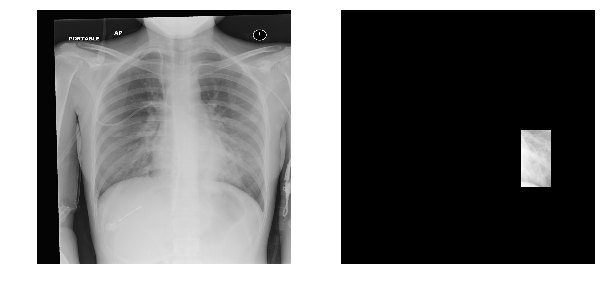

In [34]:
# Load and display random sample and their bounding boxes

class_ids = [0]
while class_ids[0] == 0:  ## look for a mask
    image_id = random.choice(dataset_train.image_ids)
    image_fp = dataset_train.image_reference(image_id)
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)

print(image.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
masked = np.zeros(image.shape[:2])
for i in range(mask.shape[2]):
    masked += image[:, :, 0] * mask[:, :, i]
plt.imshow(masked, cmap='gray')
plt.axis('off')

print(image_fp)
print(class_ids)

### Image Augmentation. Try finetuning some variables to custom values

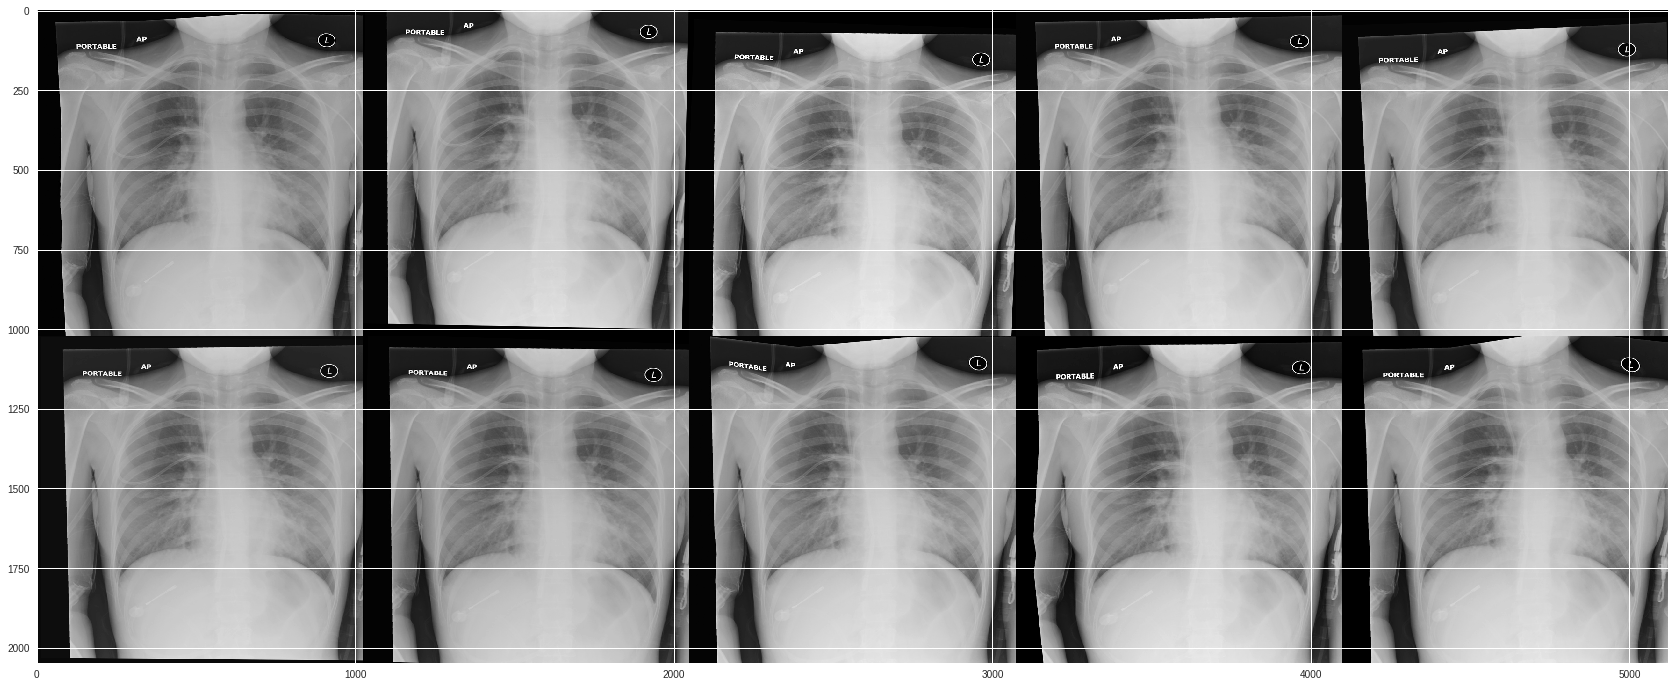

In [35]:
# Image augmentation (light but constant)
augmentation = iaa.Sequential([
    iaa.OneOf([ ## geometric transform
        iaa.Affine(
            scale={"x": (0.98, 1.02), "y": (0.98, 1.04)},
            translate_percent={"x": (-0.02, 0.02), "y": (-0.04, 0.04)},
            rotate=(-2, 2),
            shear=(-1, 1),
        ),
        iaa.PiecewiseAffine(scale=(0.001, 0.025)),
    ]),
    iaa.OneOf([ ## brightness or contrast
        iaa.Multiply((0.9, 1.1)),
        iaa.ContrastNormalization((0.9, 1.1)),
    ]),
    iaa.OneOf([ ## blur or sharpen
        iaa.GaussianBlur(sigma=(0.0, 0.1)),
        iaa.Sharpen(alpha=(0.0, 0.1)),
    ]),
])

# test on the same image as above
imggrid = augmentation.draw_grid(image[:, :, 0], cols=5, rows=2)
plt.figure(figsize=(30, 12))
_ = plt.imshow(imggrid[:, :, 0], cmap='gray')

### Now it's time to train the model. Note that training even a basic model can take a few hours. 

Note: the following model is for demonstration purpose only. We have limited the training to one epoch, and have set nominal values for the Detector Configuration to reduce run-time. 

- dataset_train and dataset_val are derived from DetectorDataset 
- DetectorDataset loads images from image filenames and  masks from the annotation data
- model is Mask-RCNN

In [36]:
os.listdir("/content/Mask_RCNN")

['README.md',
 'mask_rcnn_coco.h5',
 'samples',
 'build',
 'mrcnn',
 'images',
 'MANIFEST.in',
 'setup.cfg',
 '.gitignore',
 'dist',
 'assets',
 'setup.py',
 'mask_rcnn.egg-info',
 '.git',
 'requirements.txt',
 'LICENSE']

In [0]:
model = modellib.MaskRCNN(mode='training', config=config, model_dir=ROOT_DIR)

# Exclude the last layers because they require a matching
# number of classes
model.load_weights(COCO_WEIGHTS_PATH, by_name=True, exclude=[
    "mrcnn_class_logits", "mrcnn_bbox_fc",
    "mrcnn_bbox", "mrcnn_mask"])

In [0]:
LEARNING_RATE = 0.006

# Train Mask-RCNN Model 
import warnings 
warnings.filterwarnings("ignore")

In [39]:
%%time
## train heads with higher lr to speedup the learning
model.train(dataset_train, dataset_val,
            learning_rate=LEARNING_RATE*2,
            epochs=2,
            layers='heads',
            augmentation=None)  ## no need to augment yet

history = model.keras_model.history.history


Starting at epoch 0. LR=0.012

Checkpoint Path: /content/working/pneumonia20190105T0525/mask_rcnn_pneumonia_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4

In [40]:
%%time
model.train(dataset_train, dataset_val,
            learning_rate=LEARNING_RATE,
            epochs=6,
            layers='all',
            augmentation=augmentation)

new_history = model.keras_model.history.history
for k in new_history: history[k] = history[k] + new_history[k]


Starting at epoch 2. LR=0.006

Checkpoint Path: /content/working/pneumonia20190105T0525/mask_rcnn_pneumonia_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b 

In [0]:
%%time
model.train(dataset_train, dataset_val,
            learning_rate=LEARNING_RATE/5,
            epochs=16,
            layers='all',
            augmentation=augmentation)

new_history = model.keras_model.history.history
for k in new_history: history[k] = history[k] + new_history[k]

In [41]:
model.keras_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
model.keras_model.save_weights('original.h5')

In [0]:
model.keras_model.load_weights('original.h5', by_name=True)

In [44]:
epochs = range(1,len(next(iter(history.values())))+1)
pd.DataFrame(history, index=epochs)

loss  mrcnn_bbox_loss  mrcnn_class_loss  mrcnn_mask_loss  \
1  1.803859         0.550563          0.275730         0.411046   
2       NaN         0.530296          0.347141         0.443613   
3       NaN         0.673990          0.724918         0.675901   
4       NaN         0.663789          0.724607         0.675742   
5       NaN         0.669690          0.725145         0.675759   
6       NaN         0.676873          0.725351         0.675885   

   rpn_bbox_loss  rpn_class_loss  val_loss  val_mrcnn_bbox_loss  \
1       0.545776        0.020741  1.921253             0.480475   
2            NaN        0.136099       NaN             0.677634   
3            NaN        0.652461       NaN             0.668947   
4            NaN        0.652500       NaN             0.677634   
5            NaN        0.652492       NaN             0.685225   
6            NaN        0.652501       NaN             0.675863   

   val_mrcnn_class_loss  val_mrcnn_mask_loss  val_rpn_bbox_loss  \
1              0.266815             0.383293           0.767792   
2              0.725955             0.675278                NaN   
3              0.725128             0.675036                NaN   
4              0.725955             0.675278                NaN   
5              0.725154             0.675153                NaN   
6              0.725325             0.675209                NaN   

   val_rpn_class_loss  
1            0.022876  
2            0.652481  
3            0.652528  
4            0.652481  
5            0.652510  
6            0.652415

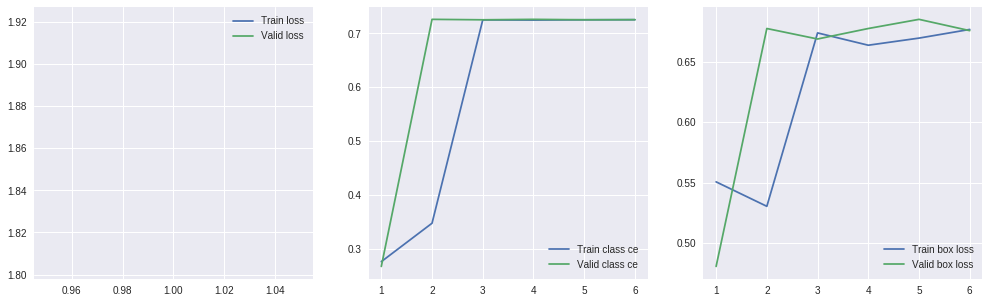

In [45]:
plt.figure(figsize=(17,5))

plt.subplot(131)
plt.plot(epochs, history["loss"], label="Train loss")
plt.plot(epochs, history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(epochs, history["mrcnn_class_loss"], label="Train class ce")
plt.plot(epochs, history["val_mrcnn_class_loss"], label="Valid class ce")
plt.legend()
plt.subplot(133)
plt.plot(epochs, history["mrcnn_bbox_loss"], label="Train box loss")
plt.plot(epochs, history["val_mrcnn_bbox_loss"], label="Valid box loss")
plt.legend()

plt.show()

In [46]:
best_epoch = np.argmin(history["val_loss"])
print("Best Epoch:", best_epoch + 1, history["val_loss"][best_epoch])

Best Epoch: 2 nan


In [47]:
# select trained model 
dir_names = next(os.walk(model.model_dir))[1]
key = config.NAME.lower()
dir_names = filter(lambda f: f.startswith(key), dir_names)
dir_names = sorted(dir_names)

if not dir_names:
    import errno
    raise FileNotFoundError(
        errno.ENOENT,
        "Could not find model directory under {}".format(self.model_dir))
    
fps = []
# Pick last directory
for d in dir_names: 
    dir_name = os.path.join(model.model_dir, d)
    # Find the last checkpoint
    checkpoints = next(os.walk(dir_name))[2]
    checkpoints = filter(lambda f: f.startswith("mask_rcnn"), checkpoints)
    checkpoints = sorted(checkpoints)
    if not checkpoints:
        print('No weight files in {}'.format(dir_name))
    else:
        checkpoint = os.path.join(dir_name, checkpoints[best_epoch])
        fps.append(checkpoint)

model_path = sorted(fps)[-1]
print('Found model {}'.format(model_path))

Found model /content/working/pneumonia20190105T0525/mask_rcnn_pneumonia_0002.h5


In [48]:
class InferenceConfig(DetectorConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode='inference', 
                          config=inference_config,
                          model_dir=ROOT_DIR)

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Loading weights from  /content/working/pneumonia20190105T0525/mask_rcnn_pneumonia_0002.h5
Re-starting from epoch 2


In [0]:
# set color for class
def get_colors_for_class_ids(class_ids):
    colors = []
    for class_id in class_ids:
        if class_id == 1:
            colors.append((.941, .204, .204))
    return colors

### How does the predicted box compared to the expected value? Let's use the validation dataset to check. 

Note that we trained only one epoch for **demonstration purposes ONLY**. You might be able to improve performance running more epochs. 

(256, 256, 3)

*** No instances to display *** 


*** No instances to display *** 

(256, 256, 3)

*** No instances to display *** 


*** No instances to display *** 

(256, 256, 3)

*** No instances to display *** 

(256, 256, 3)

*** No instances to display *** 

(256, 256, 3)

*** No instances to display *** 


*** No instances to display *** 

(256, 256, 3)

*** No instances to display *** 


*** No instances to display *** 



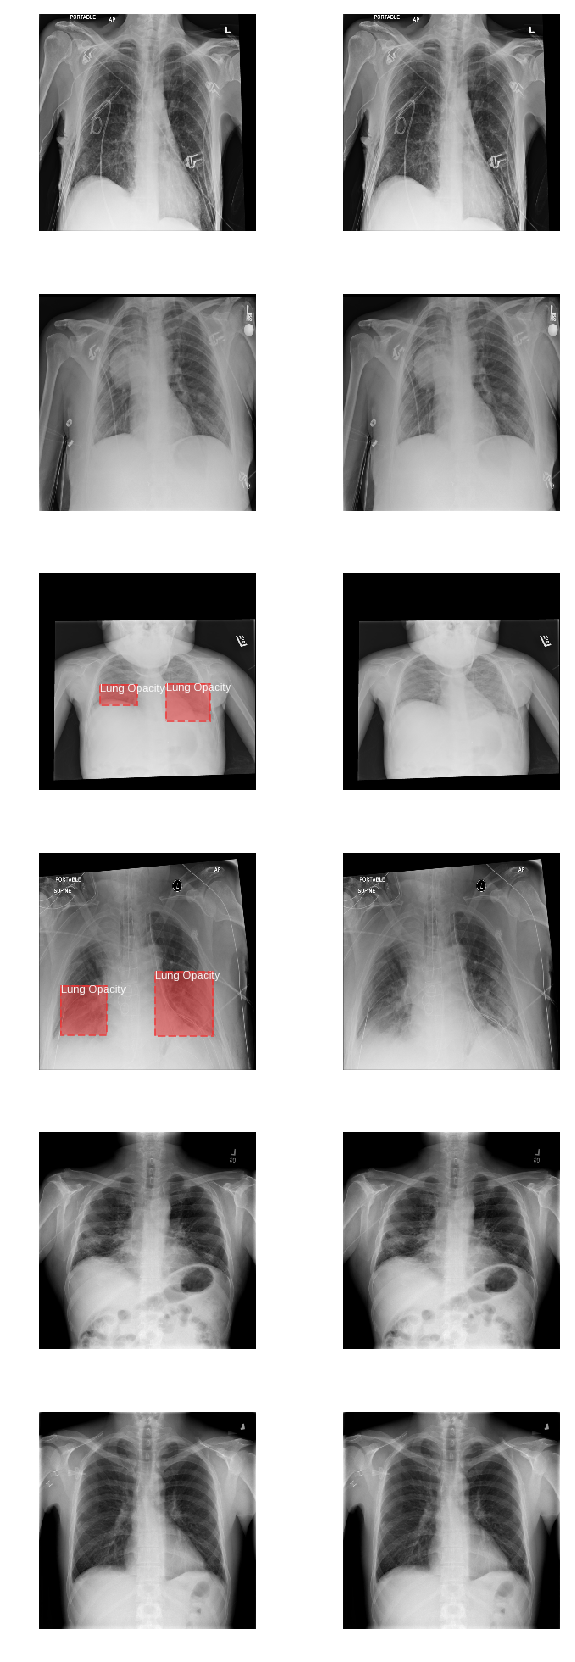

In [50]:
# Show few example of ground truth vs. predictions on the validation dataset 
dataset = dataset_val
fig = plt.figure(figsize=(10, 30))

for i in range(6):

    image_id = random.choice(dataset.image_ids)
    
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config, 
                               image_id, use_mini_mask=False)
    
    print(original_image.shape)
    plt.subplot(6, 2, 2*i + 1)
    visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                                dataset.class_names,
                                colors=get_colors_for_class_ids(gt_class_id), ax=fig.axes[-1])
    
    plt.subplot(6, 2, 2*i + 2)
    results = model.detect([original_image]) #, verbose=1)
    r = results[0]
    visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                                dataset.class_names, r['scores'], 
                                colors=get_colors_for_class_ids(r['class_ids']), ax=fig.axes[-1])

In [0]:
# Get filenames of test dataset DICOM images
test_image_fps = get_dicom_fps(test_dicom_dir)

### Final steps - Create the submission file

In [0]:
# Make predictions on test images, write out sample submission
def predict(image_fps, filepath='submission.csv', min_conf=0.95):
    # assume square image
    resize_factor = ORIG_SIZE / config.IMAGE_SHAPE[0]
    #resize_factor = ORIG_SIZE
    with open(filepath, 'w') as file:
        file.write("patientId,PredictionString\n")

        for image_id in tqdm(image_fps):
            ds = pydicom.read_file(image_id)
            image = ds.pixel_array
            # If grayscale. Convert to RGB for consistency.
            if len(image.shape) != 3 or image.shape[2] != 3:
                image = np.stack((image,) * 3, -1)
            image, window, scale, padding, crop = utils.resize_image(
                image,
                min_dim=config.IMAGE_MIN_DIM,
                min_scale=config.IMAGE_MIN_SCALE,
                max_dim=config.IMAGE_MAX_DIM,
                mode=config.IMAGE_RESIZE_MODE)

            patient_id = os.path.splitext(os.path.basename(image_id))[0]

            results = model.detect([image])
            r = results[0]

            out_str = ""
            out_str += patient_id
            out_str += ","
            assert( len(r['rois']) == len(r['class_ids']) == len(r['scores']) )
            if len(r['rois']) == 0:
                pass
            else:
                num_instances = len(r['rois'])

                for i in range(num_instances):
                    if r['scores'][i] > min_conf:
                        out_str += ' '
                        out_str += str(round(r['scores'][i], 2))
                        out_str += ' '

                        # x1, y1, width, height
                        x1 = r['rois'][i][1]
                        y1 = r['rois'][i][0]
                        width = r['rois'][i][3] - x1
                        height = r['rois'][i][2] - y1
                        bboxes_str = "{} {} {} {}".format(x1*resize_factor, y1*resize_factor, \
                                                           width*resize_factor, height*resize_factor)
                        out_str += bboxes_str

            file.write(out_str+"\n")

In [53]:
submission_fp = os.path.join(ROOT_DIR, 'submission.csv')
predict(test_image_fps, filepath=submission_fp)
print(submission_fp)

100%|██████████| 3000/3000 [08:56<00:00,  5.59it/s]

/content/working/submission.csv


In [54]:
output = pd.read_csv(submission_fp)
output.head(60)

patientId  PredictionString
0   311107a4-d6d8-495a-bf9a-5bb83cb0ea56               NaN
1   21b094d6-593d-4dc2-a53f-c8edf0ce4f59               NaN
2   2608ca32-b4b9-426b-ba16-c6eb19f88450               NaN
3   02eaa8c2-e818-4b39-92d3-aa092553b811               NaN
4   2969eca6-35c8-4e4c-8ba7-bb78273dec37               NaN
5   1fb21356-f5c3-4504-bdf1-5baefed7316c               NaN
6   245c046b-5ee7-48f0-8c5e-df7f3151c46f               NaN
7   28913461-bfee-43a8-a955-c42ebb614a7d               NaN
8   0470a3c3-5ae2-4324-9460-5720aa55a2e6               NaN
9   268dd16f-f9d4-4626-897c-2a8939a73ab0               NaN
10  03800681-c722-448f-bf8c-635080a95f00               NaN
11  1b66ef47-b795-418f-bc18-1339bc980b8b               NaN
12  19d56d5e-5de5-4daf-9c05-5d677e9938a4               NaN
13  2317d609-bef9-4488-9b56-591954dc6742               NaN
14  306da180-4249-4659-9ea6-1c2ed1455668               NaN
15  14e27811-f26a-4e21-a82b-1a5944aeb6bc               NaN
16  240cf4ce-a2f4-4790-b9ba-4b99511554a7               NaN
17  0fd44b3f-975b-410c-97d1-a9f964d1f596               NaN
18  2c61bb7e-b4ae-436b-9a71-97daa5c23e87               NaN
19  02d8eb87-93ea-4e76-94fe-2fce14a93c6c               NaN
20  02eead22-409f-4d50-ae60-e8996493a111               NaN
21  200b01ab-7e6e-4790-959e-d569c278f16a               NaN
22  1a0a8e16-16fe-4940-83cd-2917f5706b7c               NaN
23  2d76b5ea-17e8-49a9-a342-9daf21a912bb               NaN
24  2bd3afa7-414c-431f-ad98-0d1b03f175b8               NaN
25  2a7f6cf4-8c1f-4960-b678-1fd44b1d89f9               NaN
26  265ef9f1-3a21-4c9e-a8fe-740d8fae99f5               NaN
27  03bc6e8d-73df-432c-92be-9f6fe2eb7e34               NaN
28  0eb6532a-ef0c-469d-b85a-d1e6a311d5fa               NaN
29  0118519d-7a19-4ad2-b5a5-5265cb86cb2a               NaN
30  c104712e-81a4-4a39-9d0d-0ca3ec487e93               NaN
31  294f447e-a691-4c34-9740-8e2554691d81               NaN
32  20c48f19-6618-413a-99b9-9dc396f2bdc8               NaN
33  c0996b19-8cdf-49b9-9865-d906fac2a434               NaN
34  1d27bf33-c15e-45ed-aa3f-fbec202f685e               NaN
35  25f6cad5-c636-48af-bea6-7bc4263ae253               NaN
36  0d7f141d-0954-4811-8c56-ba138b74da0c               NaN
37  13a84b9d-6351-4424-b19c-c745ef755dd2               NaN
38  1d9a0d40-8406-4888-a727-7dd02e0b21aa               NaN
39  25b2b0ac-12f4-4bd5-9155-25d94a5f11ac               NaN
40  231a1bc7-7262-4330-ab24-ad777a4eb452               NaN
41  118e2eda-ca5c-467a-8f27-5cab723c3f46               NaN
42  0e1d3610-9f6c-43ea-861f-feb86643987a               NaN
43  20214557-cbc9-45ec-a162-15b8ee795702               NaN
44  24a8d719-408b-4ce5-bb1b-7dc143c7338e               NaN
45  13b56d83-b11e-4bf3-82c6-794e870a722f               NaN
46  19dbd4e3-db2f-4b33-b3db-96a3d993e5f9               NaN
47  0de98fbc-87d4-4a2a-bbc6-39d3cb18cd0c               NaN
48  223e7914-1cdb-4fe4-a086-0969efed0ee5               NaN
49  2566c9fb-c0e1-4db3-a61a-88ee9e4ba7dd               NaN
50  1d7b2783-ee65-42f5-8e43-82e3dfafe1c3               NaN
51  2af2d0c7-b138-49b0-8bf3-65aaedcf0682               NaN
52  1ad85dcd-d179-4e98-b9b8-a44d8d10165b               NaN
53  1e109391-6012-434d-bc45-ec49b3816517               NaN
54  0e0efd8d-820e-4845-965d-8d8336b45c82               NaN
55  048a59f8-9022-4598-8424-f8b0250a2e2a               NaN
56  0ffb34e5-f3c7-49c9-b9cd-5b73354f562d               NaN
57  1c7a9efb-f38e-46e0-8f2e-f9ba05112ae8               NaN
58  241ba006-6d87-49bc-a6b2-768a0669450d               NaN
59  21ea97d1-c6f8-460a-8487-8530b4fcef02               NaN

2971548b-c2b1-4b9b-bf50-00d7cc78f096
1b435cbd-9ef2-4f8e-b2a0-39cad1fd1962
27d57204-7826-4b9c-8eba-a62687bc9ee0
02186c9c-2598-4b9f-9752-b0c9e7c9128c


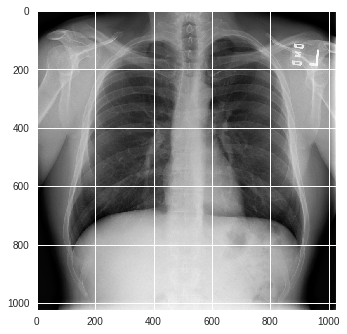

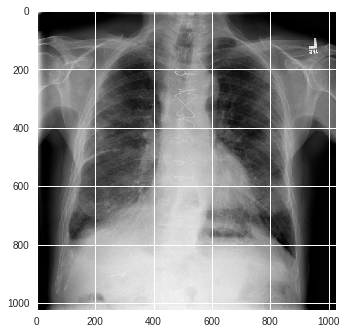

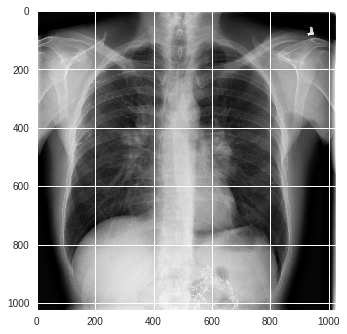

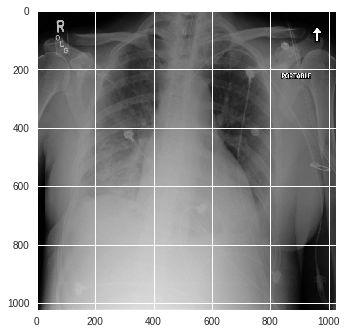

In [55]:
# show a few test image detection example
def visualize(): 
    image_id = random.choice(test_image_fps)
    ds = pydicom.read_file(image_id)
    
    # original image 
    image = ds.pixel_array
    
    # assume square image 
    resize_factor = ORIG_SIZE / config.IMAGE_SHAPE[0]
    
    # If grayscale. Convert to RGB for consistency.
    if len(image.shape) != 3 or image.shape[2] != 3:
        image = np.stack((image,) * 3, -1) 
    resized_image, window, scale, padding, crop = utils.resize_image(
        image,
        min_dim=config.IMAGE_MIN_DIM,
        min_scale=config.IMAGE_MIN_SCALE,
        max_dim=config.IMAGE_MAX_DIM,
        mode=config.IMAGE_RESIZE_MODE)

    patient_id = os.path.splitext(os.path.basename(image_id))[0]
    print(patient_id)

    results = model.detect([resized_image])
    r = results[0]
    for bbox in r['rois']: 
        print(bbox)
        x1 = int(bbox[1] * resize_factor)
        y1 = int(bbox[0] * resize_factor)
        x2 = int(bbox[3] * resize_factor)
        y2 = int(bbox[2]  * resize_factor)
        cv2.rectangle(image, (x1,y1), (x2,y2), (77, 255, 9), 3, 1)
        width = x2 - x1 
        height = y2 - y1 
        print("x {} y {} h {} w {}".format(x1, y1, width, height))
    plt.figure() 
    plt.imshow(image, cmap=plt.cm.gist_gray)

visualize()
visualize()
visualize()
visualize()

In [0]:
# remove files to allow committing (hit files limit otherwise)
!rm -rf /kaggle/working/Mask_RCNN